In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def prettify_dates(df, column='created_at', fmt='%m-%d'):
    """ Transform datetime column to column of string-formatted dates """
    df[column] = df[column].dt.strftime('%m-%d')
    for i, value in enumerate(df[column]):
        df.loc[i, 'created_at'] = value.lstrip("0").replace(" 0", " ")
    return df

def truncate_sensor_name(df):
    """ Remove PA_II_ from sensor name"""
    for i, value in enumerate(df['sensor_name']):
        df.loc[i, 'sensor_name'] = value.replace("PA_II_", "")
    return df

In [3]:
def resample_by_sensor(df,fq):
    data = df.groupby([pd.Grouper(level='sensor_name'),pd.Grouper(level='created_at',freq=fq)]).mean()
    return data

In [4]:
import plotly.express as px

In [5]:
data = pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')[['Channel A PM2.5 (ug/m3)']]

In [6]:
data = resample_by_sensor(data,fq='W')


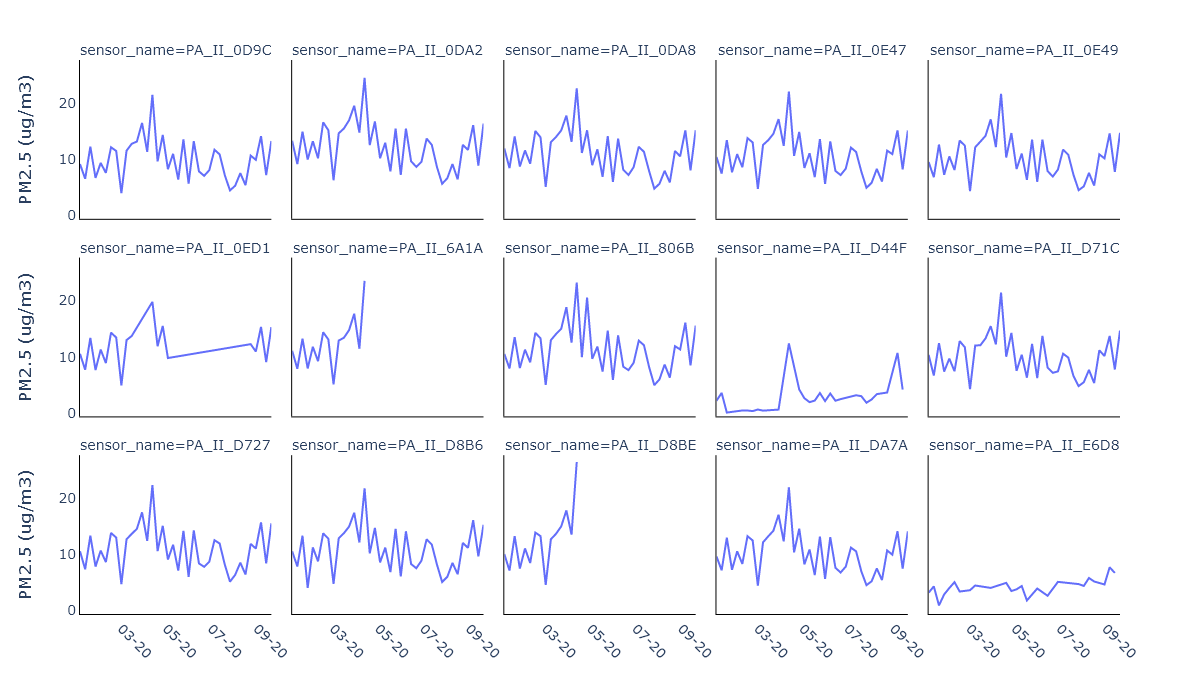

In [66]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
fig = px.line(data.reset_index(), x="created_at",y="Channel A PM2.5 (ug/m3)",facet_col='sensor_name',facet_col_wrap=5,labels=labels, width=1200, height=700)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(size=14)
)

fig.update_xaxes(
    tickangle=45,
    tickformat="%m-%y",
    nticks=8,
    zeroline=True,
    linecolor='black'
)

fig.update_yaxes(
    zeroline=True,
    linecolor='black'
)
# fig.show(config=config)
fig.show("png",width=1200, height=700)

In [44]:
data_b = data.groupby([pd.Grouper(level='created_at')]).quantile(.5)
# = data.groupby([pd.Grouper(level='created_at')]).quantile(0.25)
data_b['upper']=data.groupby([pd.Grouper(level='created_at')]).quantile(.75)
data_b['lower']=data.groupby([pd.Grouper(level='created_at')]).quantile(.25)

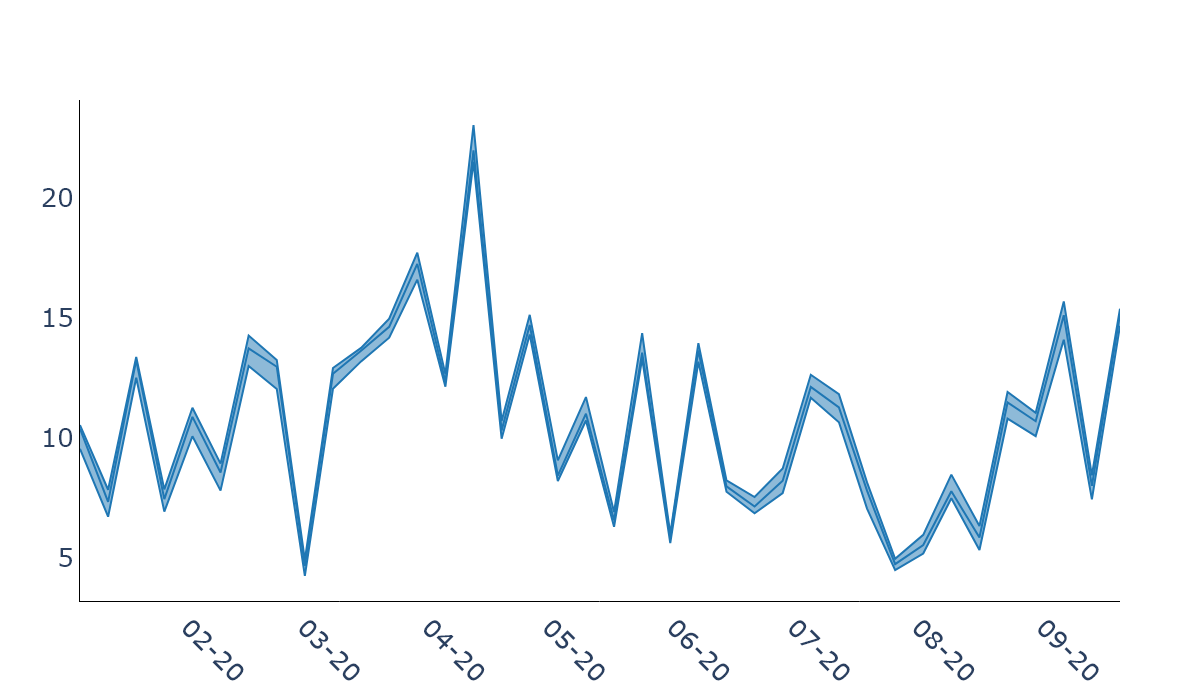

In [60]:
import plotly.graph_objects as go
fig=go.Figure()
color='#1f77b4'
fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['lower'],
    fill=None,
    mode='lines',
    name='area',
    line_color=color
))

fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['upper'],
    fill='tonexty',
    line_color=color
))

fig.add_trace(go.Scatter(
    x=data_b.reset_index()['created_at'],
    y=data_b.reset_index()['Channel A PM2.5 (ug/m3)'],
    name='area',
    line_color=color
))
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(size=26),
    showlegend=False
)

fig.update_xaxes(
    tickangle=45,
    tickformat="%m-%y",
    nticks=10,
    zeroline=True,
    linecolor='black'
)
fig.update_yaxes(
    zeroline=True,
    linecolor='black'
)
fig.update_traces(mode='lines')
fig.show('png',width=1200, height=700)

In [46]:
data_b

,Channel A PM2.5 (ug/m3),upper,lower
created_at,,,
2020-01-05 00:00:00-06:00,10.370125,10.522885,9.531398
2020-01-12 00:00:00-06:00,7.320233,7.826057,6.702259
2020-01-19 00:00:00-06:00,13.230348,13.358136,12.493867
2020-01-26 00:00:00-06:00,7.436392,7.841636,6.915493
2020-02-02 00:00:00-06:00,10.862442,11.242810,10.055540
2020-02-09 00:00:00-06:00,8.544072,8.915553,7.789959
2020-02-16 00:00:00-06:00,13.719260,14.251903,12.985634
2020-02-23 00:00:00-06:00,12.952832,13.235721,12.027882
2020-03-01 00:00:00-06:00,4.652612,4.906506,4.232881


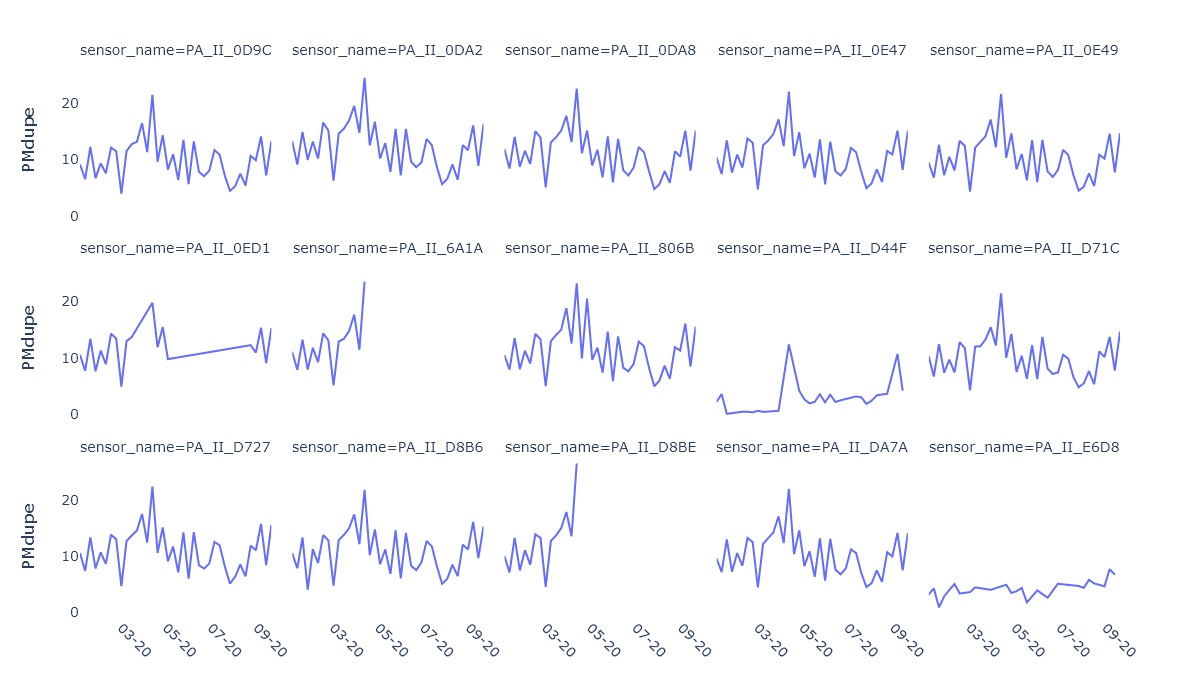

In [64]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
data2=data
data2['PMdupe']=data2['Channel A PM2.5 (ug/m3)']
fig = px.line(data2.reset_index(), x="created_at",y="PMdupe",line_group='sensor_name',facet_col='sensor_name',facet_col_wrap=5,labels=labels, width=1200, height=700)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(size=14)
)

fig.update_xaxes(
    tickangle=45,
    tickformat="%m-%y",
    nticks=8
)

# fig.show(config=config)
fig.show("png",width=1200, height=700)